In [1]:
!pip install -U scikit-learn
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

!pip install xgboost
from xgboost import XGBClassifier
train= pd.read_csv('datasets/web_page_train.csv')

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import sklearn
from xgboost import XGBClassifier
train.head(10)

,Webpage_id,Tag,text
0,11400,news,b' Questions? +1 800-883-2055 Set U...
1,55539,others,"b"" Skip to main navigation Skip to Conten..."
2,42040,others,"b"" FDA Voice FDA's official blog Se..."
3,41174,others,b' WHERE THE ACTION IS HOM...
4,70573,news,"b"" This site requires javascript, ..."
5,19573,publication,"b"" ..."
6,77951,others,b' Folders Galleri...
7,25774,news,b' Home Topics Disparities Policy ...
8,10095,news,b' Home Submit Press Re...
9,350,clinicalTrials,"b"" \xe4\xbb\x8a\xe5\xa4\xa9\xe6\x98\xaf\x..."


In [3]:
train['text'][0]

"b'          Questions? +1 800-883-2055   Set Up FREE Account  Submit Release                    Why Us     Press Releases     Services    Pricing & Comparison Chart    Distribution    Resources    Contact               Contact        Resources    Contact        World Media Directory \\xc2\\xb7  RSS \\xc2\\xb7  Email Newsletters   There were 732 press releases posted in the last 24 hours and 172,125 in the last 365 days.     Press Releases  466,215\\n  Press Releases     Published on  September 20, 2017 - 06:48 GMT    Haptics Technology Market Research, Industry Analysis, Growth, Size, Share, Trends, Forecast to 2022    This report covers market characteristics, size and growth, segmentation, regional breakdowns, competitive landscape, market shares, trends and strategies\\n\\nPUNE, INDIA, September 20, 2017 /EINPresswire.com/ -- Haptic technology or Haptics is a technology  \\xe2\\x80\\xa6  Distribution channels: IT , Media, Advertising & PR ...      Published on  September 20, 2017 -

In [4]:
test= pd.read_csv('datasets/web_page_test.csv')

In [5]:
test.head()

,Webpage_id,text
0,22193,b' Sign in ...
1,66880,"b"" ..."
2,13155,b' Skip to Main Content ...
3,10638,b' Skip to main con...
4,42466,"b"" FDA Voice FDA's official blog Se..."


In [6]:
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tag', ylabel='count'>

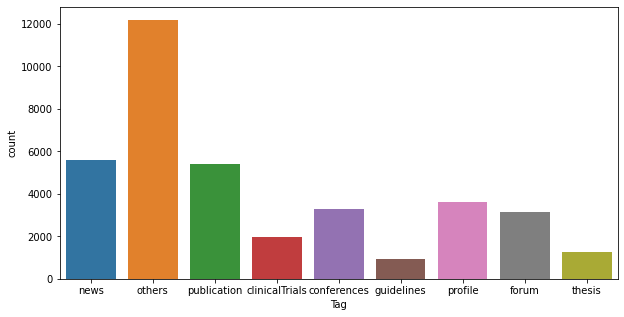

In [7]:
plt.subplots(figsize=(10, 5))
sns.countplot(train['Tag'])

In [8]:
train.isnull().sum()

Webpage_id    0
Tag           0
text          0
dtype: int64

In [9]:
train1= train.drop(labels='Webpage_id',axis=1)

In [10]:
train1.tail()
y= train1['Tag']

In [11]:
label= LabelEncoder()
y= label.fit_transform(y)

In [12]:
sklearn.__version__


'0.24.2'

In [13]:
x= train1['text']

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [15]:
from sklearn.svm import LinearSVC

In [16]:
train.head()
for i in train.index:
    z= train['text'][i][1:]
    train['text'][i]=z
    
    

for i in test.index:
    z= test['text'][i][1:]
    test['text'][i]=z
    

    
test.head()

<ipython-input-16-b332eac809de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'][i]=z
<ipython-input-16-b332eac809de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['text'][i]=z


,Webpage_id,text
0,22193,' Sign in ...
1,66880,""" ..."
2,13155,' Skip to Main Content ...
3,10638,' Skip to main cont...
4,42466,""" FDA Voice FDA's official blog Sec..."


In [17]:
import nltk

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
train['text']=train['text'].apply(lambda x:" ".join(word for word in x.split() if word not in (stop)))
test['text']=test['text'].apply(lambda x:" ".join(word for word in x.split() if word not in (stop)))

In [20]:
train.head()

,Webpage_id,Tag,text
0,11400,news,' Questions? +1 800-883-2055 Set Up FREE Accou...
1,55539,others,""" Skip main navigation Skip Content Investor R..."
2,42040,others,""" FDA Voice FDA's official blog Secondary menu..."
3,41174,others,' WHERE THE ACTION IS HOME ABOUT ABOUT US MEET...
4,70573,news,""" This site requires javascript, appear enable..."


In [21]:
train['text']=train['text'].str.lower()
test['text']= test['text'].str.lower()

In [22]:
import string
exclude = set(string.punctuation)
def rem(x):
    try:
        x= ''.join(ch for ch in x if ch not in exclude)
    except:
        pass
    return x
train['text']=train['text'].apply(rem)
test['text']= test['text'].apply(rem)

In [23]:
train.tail()

,Webpage_id,Tag,text
37407,10680,guidelines,skip content skip navigation login returntowo...
37408,33713,others,my ana staff nurses advanced practice nurses ...
37409,6542,publication,home submit manuscript my account advanced se...
37410,9655,news,skip content satprnews pr distribution menu p...
37411,53389,others,skip main content asm journals antimicrobial ...


In [24]:
x= train['text']


In [25]:
pipe= Pipeline([('tdif',vectorizer),('clf',XGBClassifier())])
pipe.fit(x,y)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:58:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tdif', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=7, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [26]:
test

,Webpage_id,text
0,22193,sign home current issue past issues for autho...
1,66880,global selector partnering contact our compan...
2,13155,skip main content mobile rss feeds login emai...
3,10638,skip main content this service advanced javas...
4,42466,fda voice fdas official blog secondary menu s...
...,...,...
16030,9297,toggle navigation menu home about us journals...
16031,10048,freddiemaccom freddie mac home singlefamily m...
16032,32811,information for prospective students current ...
16033,40467,registered nurses association ontario lxe2x80...


In [37]:
pred= pipe.predict(test['text'])

In [38]:
pred1= label.inverse_transform(pred)
pred1

array(['publication', 'others', 'conferences', ..., 'others', 'others',
       'publication'], dtype=object)

In [41]:
output=pd.DataFrame(data={'Webpage_id':test['Webpage_id'],'Tag':pred1})

In [42]:
output.to_csv('text111.csv',index=False)